### **Importing the Necessary Libraries to Solve problem**

In [ ]:
!pip install catboost

In [ ]:
##Warning Libraries
import warnings
warnings.filterwarnings('ignore')

##Scientific and Data Manipulation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Boosting Algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

### Performance Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Upload the Datasets**

In [ ]:
from google.colab import files
uploader = files.upload()

Saving sample_submission_QrCyCoT.csv to sample_submission_QrCyCoT (6).csv
Saving test_YCcRUnU.csv to test_YCcRUnU (6).csv
Saving train_Df64byy.csv to train_Df64byy (6).csv


In [ ]:
train = pd.read_csv('train_Df64byy.csv')
test = pd.read_csv('test_YCcRUnU.csv')
ss = pd.read_csv('sample_submission_QrCyCoT.csv')

In [ ]:
train.shape, test.shape, ss.shape

((50882, 14), (21805, 13), (21805, 2))

## **1. Understanding of Dataset**

In [ ]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
display_unique(train)
print("**********************************************************************")
display_unique(test)

No of Unique Values in ID Column are : 50882
Actual Unique Values in ID Column are : [    1     2     3 ... 50880 50881 50882]

No of Unique Values in City_Code Column are : 36
Actual Unique Values in City_Code Column are : ['C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C2'
 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3' 'C30'
 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']

No of Unique Values in Region_Code Column are : 5316
Actual Unique Values in Region_Code Column are : [   1    2    4 ... 6191 6193 6194]

No of Unique Values in Accomodation_Type Column are : 2
Actual Unique Values in Accomodation_Type Column are : ['Owned' 'Rented']

No of Unique Values in Reco_Insurance_Type Column are : 2
Actual Unique Values in Reco_Insurance_Type Column are : ['Individual' 'Joint']

No of Unique Values in Upper_Age Column are : 58
Actual Unique Values in Upper_Age Column are : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3

In [ ]:
def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "train" :

data_types  = ["float64","int64","object"]
display_data_information(train, data_types, "train")

 Information of  train : Rows =  50882 | Columns =  14 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response           

In [ ]:
def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "train", No. of Rows in Head = 5 and No. of Rows in Tail = 5 :

display_head_tail(train, head_rows=5, tail_rows=5)

'Data Head & Tail :'

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [ ]:
display_head_tail(test, head_rows=5, tail_rows=5)

'Data Head & Tail :'

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0
21804,72687,C2,3617,Owned,Individual,73,73,No,X2,14+,2.0,3,23040.0


### **Removing the Duplicates in our Dataset**

In [ ]:
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

train = remove_duplicate(train)
test = remove_duplicate(test)

BEFORE REMOVING DUPLICATES - No. of Rows =  50882
AFTER REMOVING DUPLICATES  - No. of Rows =  50882
BEFORE REMOVING DUPLICATES - No. of Rows =  21805
AFTER REMOVING DUPLICATES  - No. of Rows =  21805


## **2. EXPLORATORY DATA ANALYSIS**


### **Handling Missing Values**

* For Continuous Variables I'm replacing with - Mean/Median/Any Specific Value 

* For Categorical Variables I'm replacing with - Others/ForwardFill/BackFill

In [ ]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[ column ] = data[ column ].fillna(fill_value)
#             print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

In [ ]:
fill_missing_values(train, 0, "Forward_Fill", ['Health Indicator'], "train")
fill_missing_values(train, 0, "Forward_Fill", ['Holding_Policy_Type'], "train")
fill_missing_values(train, 0, "Forward_Fill", ['Holding_Policy_Duration'], "train")

Missing Values BEFORE REMOVAL in  train  data


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Missing Values BEFORE REMOVAL in  train  data


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,14+,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X2,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,2.0,1.0,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [ ]:
fill_missing_values(test, 0, "Forward_Fill", ['Holding_Policy_Duration','Health Indicator','Holding_Policy_Type'], "test")
fill_missing_values(test, 0, "Backward_Fill", ['Health Indicator'], "test")

Missing Values BEFORE REMOVAL in  test  data


ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

Missing Values AFTER REMOVAL in  test  data


ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           1
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

Missing Values BEFORE REMOVAL in  test  data


ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           1
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

Missing Values AFTER REMOVAL in  test  data


ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,3.0,3.0,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,6.0,3.0,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


### **Display Unique Data**

In [ ]:
for i in train:
    print(f"column {i} {train[i].nunique()} unique values.")

column ID 50882 unique values.
column City_Code 36 unique values.
column Region_Code 5316 unique values.
column Accomodation_Type 2 unique values.
column Reco_Insurance_Type 2 unique values.
column Upper_Age 58 unique values.
column Lower_Age 60 unique values.
column Is_Spouse 2 unique values.
column Health Indicator 9 unique values.
column Holding_Policy_Duration 15 unique values.
column Holding_Policy_Type 4 unique values.
column Reco_Policy_Cat 22 unique values.
column Reco_Policy_Premium 6977 unique values.
column Response 2 unique values.


## **3. Feature Engineering**

In [ ]:
combine_set = pd.concat([train,test],axis=0)

In [ ]:
combine_set['Is_Spouse']=combine_set['Is_Spouse'].replace({'Yes':1,'No':0})
combine_set['Accomodation_Type']=combine_set['Accomodation_Type'].replace({'Owned':1,'Rented':0})
combine_set['Reco_Insurance_Type']=combine_set['Reco_Insurance_Type'].replace({'Individual':1,'Joint':0})
combine_set['Holding_Policy_Duration']=combine_set['Holding_Policy_Duration'].replace({'14+':15.0}).astype(str)

In [ ]:
combine_set['Holding_Policy_Duration']=combine_set['Holding_Policy_Duration'].astype('float64')
combine_set['Holding_Policy_Type']=combine_set['Holding_Policy_Type'].astype('float64')

In [ ]:
combine_set.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,0,1,36,36,0,X1,15.0,3.0,22,11628.0,0.0
1,2,C5,1117,1,0,75,22,0,X2,15.0,3.0,22,30510.0,0.0
2,3,C5,3732,1,1,32,32,0,X2,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,1,0,52,48,0,X1,15.0,3.0,19,17780.0,0.0
4,5,C8,2190,0,1,44,44,0,X2,3.0,1.0,16,10404.0,0.0


In [ ]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  int64  
 4   Reco_Insurance_Type      72687 non-null  int64  
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  int64  
 8   Health Indicator         72687 non-null  object 
 9   Holding_Policy_Duration  72687 non-null  float64
 10  Holding_Policy_Type      72687 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
 13  Response                 50882 non-null  float64
dtypes: float64(4), int64(8

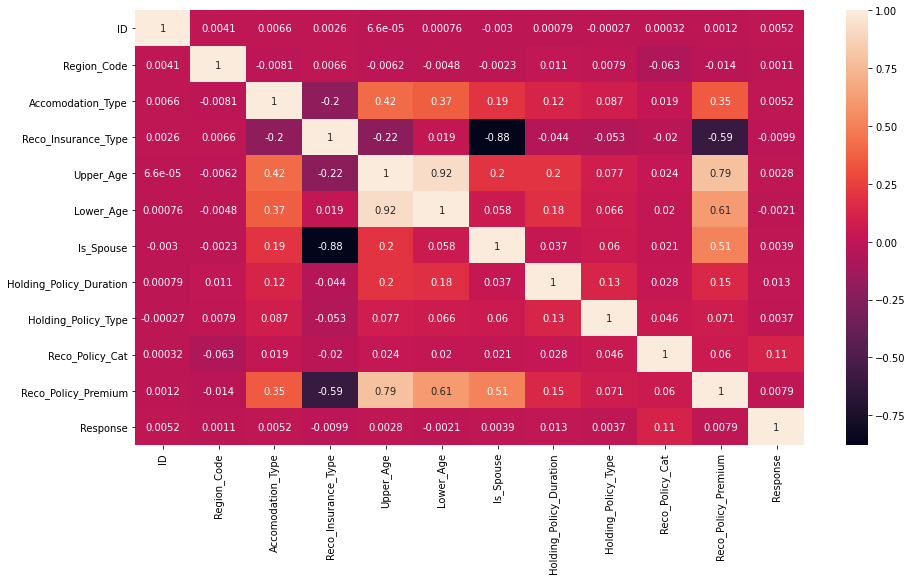

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(combine_set.corr(), annot=True)

In [ ]:
combine_set['Reco_Policy_Premium'] = pd.cut(x=combine_set['Reco_Policy_Premium'], bins=[0,15000,30000,45000], labels=["Small","Medium","Large"])
combine_set['Upper_Age'] = pd.cut(x=combine_set['Upper_Age'], bins=[20, 40, 60, 80], labels=["Teens","Adult","Senior"])

In [ ]:
combine_set['Upper_Age'].value_counts()

Teens     30485
Adult     23211
Senior    16952
Name: Upper_Age, dtype: int64

In [ ]:
combine_set['People_Response_per_region'] = combine_set.groupby(['Region_Code'])['Response'].transform('mean')
combine_set['People_Response_per_city'] = combine_set.groupby(['City_Code'])['Response'].transform('mean')

In [ ]:
combine_set.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response',
       'People_Response_per_region', 'People_Response_per_city'],
      dtype='object')

In [ ]:
train.shape[0]

50882

In [ ]:
# Getting back Train and Test after Preprocessing :
train = combine_set[0 : train.shape[0]]
test  = combine_set[train.shape[0] : ]

In [ ]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,People_Response_per_region,People_Response_per_city
0,50883,C1,156,1,1,Teens,30,0,X1,6.0,3.0,5,Small,NaN,0.379310,0.246072
1,50884,C4,7,1,0,Senior,68,1,X1,3.0,3.0,18,Large,NaN,0.218750,0.242168
2,50885,C1,564,0,1,Teens,28,0,X3,2.0,4.0,17,Small,NaN,0.105263,0.246072
3,50886,C3,1177,0,1,Teens,23,0,X3,3.0,3.0,18,Small,NaN,0.235294,0.237472
4,50887,C1,951,1,1,Senior,75,0,X3,3.0,3.0,5,Medium,NaN,0.384615,0.246072


In [ ]:
cols = ['City_Code','Region_Code']
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [ ]:
test.head()

,ID,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,People_Response_per_region,People_Response_per_city
0,50883,1,1,Teens,30,0,X1,6.0,3.0,5,Small,NaN,0.379310,0.246072
1,50884,1,0,Senior,68,1,X1,3.0,3.0,18,Large,NaN,0.218750,0.242168
2,50885,0,1,Teens,28,0,X3,2.0,4.0,17,Small,NaN,0.105263,0.246072
3,50886,0,1,Teens,23,0,X3,3.0,3.0,18,Small,NaN,0.235294,0.237472
4,50887,1,1,Senior,75,0,X3,3.0,3.0,5,Medium,NaN,0.384615,0.246072


In [ ]:
test.drop('Response', axis=1, inplace=True)

In [ ]:
train.head()

,ID,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,People_Response_per_region,People_Response_per_city
0,1,0,1,Teens,36,0,X1,15.0,3.0,22,Small,0.0,0.125000,0.237472
1,2,1,0,Senior,22,0,X2,15.0,3.0,22,Large,0.0,0.294118,0.230205
2,3,1,1,Teens,32,0,X2,1.0,1.0,19,Small,1.0,0.142857,0.230205
3,4,1,0,Adult,48,0,X1,15.0,3.0,19,Medium,0.0,0.400000,0.235081
4,5,0,1,Adult,44,0,X2,3.0,1.0,16,Small,0.0,0.090909,0.241971


### **Data Splitting**

In [ ]:
target_col = 'Response'
features = ['Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Is_Spouse', 'Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium','People_Response_per_region','People_Response_per_city']

In [ ]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float64']
    encoding_data.astype(dtypes_list[0]).dtypes
    
    return encoding_data

In [ ]:
le_cols = ['Health Indicator','Upper_Age','Reco_Policy_Premium']
encoding_strategy = ['LabelEncoding','OneHotEncoding']
train_new = data_encoding(encoding_strategy[0], train, le_cols)
test_new = data_encoding(encoding_strategy[0], test, le_cols)

IF LabelEncoding
column Health Indicator
column Upper_Age
column Reco_Policy_Premium
IF LabelEncoding
column Health Indicator
column Upper_Age
column Reco_Policy_Premium


In [ ]:
train_new.head()

,ID,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,People_Response_per_region,People_Response_per_city
0,1,0,1,2,36,0,0,15.0,3.0,22,2,0.0,0.125000,0.237472
1,2,1,0,1,22,0,1,15.0,3.0,22,0,0.0,0.294118,0.230205
2,3,1,1,2,32,0,1,1.0,1.0,19,2,1.0,0.142857,0.230205
3,4,1,0,0,48,0,0,15.0,3.0,19,1,0.0,0.400000,0.235081
4,5,0,1,0,44,0,1,3.0,1.0,16,2,0.0,0.090909,0.241971


### 5. **Feature Scaling**

In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
  if  scaling_strategy =="StandardScaler" :
      scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
  elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
  else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    
  return scaling_data

In [ ]:
scaling_strategy = ["StandardScaler","MinMaxScaler"]
train_scale = data_scaling( scaling_strategy[1] , train_new , train_new[features].columns )
test_scale = data_scaling( scaling_strategy [1] , test_new , test_new[features].columns )

In [ ]:
print("train_encode SHAPE   : ",train_scale.shape)
display("train_encode COLUMNS : ",train_scale.head())
print("**********************************************************************")
print("**********************************************************************")
print("test_encode SHAPE   : ",test_scale.shape)
display("test_encode COLUMNS : ",test_scale.head())

train_encode SHAPE   :  (50882, 15)


'train_encode COLUMNS : '

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Response_Per_Age
0,1,0.628571,0.518650,0.0,1.0,0.315789,0.338983,0.0,0.000,1.000000,0.666667,1.000000,0.553196,0.0,0.000000
1,2,0.885714,0.180203,1.0,0.0,1.000000,0.101695,0.0,0.125,1.000000,0.666667,1.000000,0.880732,0.0,0.000000
2,3,0.885714,0.602454,1.0,1.0,0.245614,0.271186,0.0,0.125,0.000000,0.000000,0.857143,0.402031,1.0,0.166667
3,4,0.457143,0.706766,1.0,0.0,0.596491,0.542373,0.0,0.000,1.000000,0.666667,0.857143,0.697386,0.0,0.000000
4,5,0.971429,0.353464,0.0,1.0,0.456140,0.474576,0.0,0.125,0.142857,0.000000,0.714286,0.515430,0.0,0.000000


**********************************************************************
**********************************************************************
test_encode SHAPE   :  (21805, 14)


'test_encode COLUMNS : '

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response_Per_Age
0,50883,0.000000,0.025065,1.0,1.0,0.210526,0.237288,0.0,0.00,0.357143,0.666667,0.190476,0.568593,0.0
1,50884,0.857143,0.000970,1.0,0.0,0.894737,0.881356,1.0,0.00,0.142857,0.666667,0.809524,0.898108,0.0
2,50885,0.000000,0.091041,0.0,1.0,0.175439,0.203390,0.0,0.25,0.071429,1.000000,0.761905,0.483669,0.0
3,50886,0.628571,0.190168,0.0,1.0,0.087719,0.118644,0.0,0.25,0.142857,0.666667,0.809524,0.478090,0.0
4,50887,0.000000,0.153622,1.0,1.0,1.000000,1.000000,0.0,0.25,0.142857,0.666667,0.190476,0.779579,0.0


In [ ]:
train_scale.drop(['Lower_Age'], axis=1, inplace=True)
test_scale.drop(['Lower_Age'], axis=1, inplace=True)

In [ ]:
test_new.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,People_Response_per_region,People_Response_per_city
0,1,1,2,30,0,0,6.0,3.0,5,2,0.379310,0.246072
1,1,0,1,68,1,0,3.0,3.0,18,0,0.218750,0.242168
2,0,1,2,28,0,2,2.0,4.0,17,2,0.105263,0.246072
3,0,1,2,23,0,2,3.0,3.0,18,2,0.235294,0.237472
4,1,1,1,75,0,2,3.0,3.0,5,1,0.384615,0.246072


In [ ]:
features = ['Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Is_Spouse', 'Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium','People_Response_per_region','People_Response_per_city']
target_col = 'Response'
x_train, x_val, y_train, y_val = train_test_split(train_new[features], train_new[target_col], test_size=0.2, random_state=50)
x_test = test_new[features]

### **Model Building**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred_train = dt.predict(x_train)
dt_pred_val = dt.predict(x_val)
train_score = roc_auc_score(dt_pred_train, y_train)
val_score = roc_auc_score(dt_pred_val, y_val)
print(train_score)
print("**********************************************")
print(val_score)

0.9991138465504462
**********************************************
0.5753138185279876


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred_train = rf.predict(x_train)
rf_pred_val = rf.predict(x_val)
train_score = roc_auc_score(rf_pred_train, y_train)
val_score = roc_auc_score(rf_pred_val, y_val)
print(train_score)
print("**********************************************")
print(val_score)

0.9987070546095322
**********************************************
0.6502013736109473


In [ ]:
x_test['People_Response_per_region'].fillna(method='ffill', inplace=True)

In [ ]:
rf_predictions = rf.predict(x_test)
ss['Response'] = rf_predictions
submission = pd.DataFrame({'ID':ss['ID'], 'Response':rf_predictions})
submission.to_csv('rf_submission.csv', index=False)
files.download('rf_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cb = CatBoostClassifier(iterations=100)
cb.fit(x_train, y_train)
cb_pred_train = cb.predict(x_train)
cb_pred_val = cb.predict(x_val)
train_score = roc_auc_score(cb_pred_train, y_train)
val_score = roc_auc_score(cb_pred_val, y_val)
print(train_score)
print("**********************************************")
print(val_score)

Learning rate set to 0.414242
0:	learn: 0.5797518	total: 9.23ms	remaining: 914ms
1:	learn: 0.5377242	total: 17.9ms	remaining: 878ms
2:	learn: 0.5151445	total: 24.9ms	remaining: 806ms
3:	learn: 0.5008600	total: 33.1ms	remaining: 794ms
4:	learn: 0.4928239	total: 41.2ms	remaining: 783ms
5:	learn: 0.4884196	total: 49.8ms	remaining: 780ms
6:	learn: 0.4838721	total: 58.3ms	remaining: 774ms
7:	learn: 0.4808198	total: 66.3ms	remaining: 763ms
8:	learn: 0.4787554	total: 74.7ms	remaining: 755ms
9:	learn: 0.4772762	total: 82.8ms	remaining: 745ms
10:	learn: 0.4755108	total: 91.4ms	remaining: 739ms
11:	learn: 0.4749098	total: 100ms	remaining: 736ms
12:	learn: 0.4741058	total: 109ms	remaining: 728ms
13:	learn: 0.4735285	total: 117ms	remaining: 721ms
14:	learn: 0.4721745	total: 126ms	remaining: 712ms
15:	learn: 0.4716390	total: 134ms	remaining: 704ms
16:	learn: 0.4710439	total: 142ms	remaining: 695ms
17:	learn: 0.4704858	total: 151ms	remaining: 687ms
18:	learn: 0.4699358	total: 159ms	remaining: 678ms


In [ ]:
cb_predictions = cb.predict(x_test)
ss['Response'] = cb_predictions
submission = pd.DataFrame({'ID':ss['ID'], 'Response':cb_predictions})
submission.to_csv('cb_submission.csv', index=False)
files.download('cb_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, verbosity = 0,
                                            scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, 
                                                 max_depth=5, scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",
                                             verbosity = -1, max_bin = 60,num_leaves = 300,
                                             boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=494, max_depth=5, scale_pos_weight=2.5),
               
               '3. RFClassifier' : RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=50, min_samples_split=50, min_samples_leaf=10, max_features='auto')
 }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )

['0._XGBoost', '1.CatBoost', '2.LightGBM', '3. RFClassifier']
[XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=494, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, seed=None,
              silent=None, subsample=0.7, updater='grow_histmaker',
              verbosity=0), <catboost.core.CatBoostClassifier object at 0x7fa45596c0d0>, LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.15, max_bin=60,
               max_depth=5, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=494, n_jobs=-1, num_leaves=300,
               objective='binary', random_state=None, reg_

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                              ('Random Forest Best', list(Classifiers.values())[3])
                                             ], 
                                              voting='soft',weights=[5,5,5.2,5.5])

file_name = "SEED-294_AGAIN_RANK_4_ENSEMBLE_SOFT_5_5_5.2"
ensemble_model.fit(x_train,y_train)

0:	learn: 0.6640588	total: 15.7ms	remaining: 7.74s
1:	learn: 0.6496675	total: 30.8ms	remaining: 7.58s
2:	learn: 0.6359328	total: 43.6ms	remaining: 7.14s
3:	learn: 0.6251395	total: 58.1ms	remaining: 7.12s
4:	learn: 0.6160966	total: 72.7ms	remaining: 7.11s
5:	learn: 0.6096083	total: 87.3ms	remaining: 7.1s
6:	learn: 0.6070943	total: 99.4ms	remaining: 6.92s
7:	learn: 0.6044261	total: 114ms	remaining: 6.92s
8:	learn: 0.6025143	total: 129ms	remaining: 6.94s
9:	learn: 0.6006524	total: 141ms	remaining: 6.81s
10:	learn: 0.5994155	total: 155ms	remaining: 6.83s
11:	learn: 0.5949768	total: 170ms	remaining: 6.84s
12:	learn: 0.5940855	total: 185ms	remaining: 6.84s
13:	learn: 0.5931189	total: 200ms	remaining: 6.85s
14:	learn: 0.5924439	total: 213ms	remaining: 6.82s
15:	learn: 0.5919922	total: 234ms	remaining: 7s
16:	learn: 0.5910772	total: 249ms	remaining: 6.99s
17:	learn: 0.5904129	total: 264ms	remaining: 6.98s
18:	learn: 0.5895859	total: 276ms	remaining: 6.91s
19:	learn: 0.5893550	total: 291ms	rema

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=5, min_child_weight=1,
                                            missing=None, n_estimators=494,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_p...
                                                     max_depth=50,
                                                     max_features='auto',
                

In [ ]:
ensemble_predictions_train = ensemble_model.predict(x_train)
ensemble_predictions_val = ensemble_model.predict(x_val)
train_score = roc_auc_score(ensemble_predictions_train, y_train)
val_score = roc_auc_score(ensemble_predictions_val, y_val)
print(train_score)
print("**********************************************")
print(val_score)

0.7132130768995505
**********************************************
0.648125730489868


In [ ]:
ensemble_predictions = ensemble_model.predict(x_test)
ss['Response'] = ensemble_predictions
submission = pd.DataFrame({'ID':ss['ID'], 'Response':ensemble_predictions})
submission.to_csv('ensemble_submission.csv', index=False)
files.download('ensemble_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>